# Regression analysis of Gapminder data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("gap.tsv", sep="\t")
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### Exercise 1

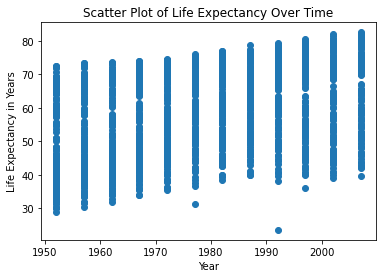

In [3]:
plt.scatter(data=data, x="year", y="lifeExp")
plt.xlabel("Year")
plt.ylabel("Life Expectancy in Years")
plt.title("Scatter Plot of Life Expectancy Over Time");

### Question 1
The plot shows a general trend of increasing life expectancy over time. It looks like a linear trend, however it is difficult to know for sure given that the change appears only slight over this time interval.

In [4]:
# gets list of lists -> life expectancy for each country for each year
life_exp_per_year = data.groupby("year")["lifeExp"].apply(list)
# gets list of the years of data collection
years = data.year.drop_duplicates()

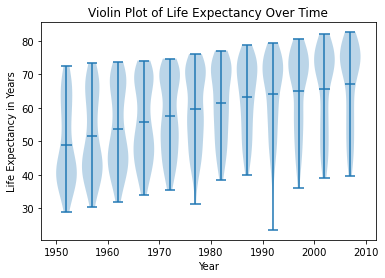

In [5]:
plt.violinplot(life_exp_per_year, years, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy in Years")
plt.title("Violin Plot of Life Expectancy Over Time");

### Question 2
The graph for individual years seems to be bimodal, with one mode above the mean and one below. In 1950-1960 it appears that most countries are below the mean life expectancy, and the graph is skewed toward the higher life expectancies. The skew decreases with time, however, and flips around 1970, where the two modes seem similar in size. By the 2000s the graph is skewed the other direction in an significant way.

### Question 3
I would reject the null hypothesisis of no relationship between life expectancy and time because mean life expectancy increases for every year measured in this dataset.

### Question 4
I think that a violin plot of the residuals from a linear regression model would look similar to the one I already plotted except the means would be around zero for each year, so it would be without the general upward trend. That's because the residuals are the values relative to the linear model at that year, which would be close to the mean life expectancy for that year (I don't think the difference in the model's prediction and the mean would be significant).

### Question 5
The simple linear model of life expectancy vs. year is inherently assuming that there are no other variables affecting life expectancy, and that the distribution of life expectancies would be centered around the mean for each year. This does not seem to true, however, because just by looking at the violin plot in question 1 you can see the distributions are not centered around the mean.

### Exercise 2

In [6]:
# training data
X = data.year.values.reshape(-1, 1) # LinearRegression() requires a 2D array for samples
# target data
y = data.lifeExp

reg = LinearRegression().fit(X, y)

In [7]:
# prints the predicted values for every five years from 1950-2010
years_range = np.array(list(range(1950, 2011, 5)))
reg_df = pd.DataFrame(reg.predict(years_range.reshape(-1, 1))).set_index(years_range)
reg_df.columns = ["predictedLifeExp"]

reg_df

,predictedLifeExp
1950,49.860276
1955,51.489796
1960,53.119315
1965,54.748834
1970,56.378353
1975,58.007872
1980,59.637391
1985,61.266910
1990,62.896430
1995,64.525949


I decided to print the fitted model as a list of values (above) because I thought it would be an easy way to see the kind of predictions the model was making.

In [8]:
reg.intercept_

-585.6521874415448

In [9]:
reg.coef_

array([0.32590383])

The values above give the y-intercept and the slope, so the model in "y = mx + b" format would be:

$predicted\ life\ expectancy = (0.32590383 * year) - 585.6521874415448$

### Question 6
According to my linear regression model, life expectancy increases by about 0.326 years on average every year around the world. This can be seen from the value of `reg.coef_` in exercise 2.

### Question 7
I reject the null hypothesis of no relationship between year and life expectancy because the slope of the linear regression seems to be significantly greater than zero, which matches what I predicted the relationship was by just looking at the violin plot.

### Exercise 3

In [10]:
# adds a residual column to the dataset for the life expectancy resiudual with a tuple to be transforms
data["lifeExpResid"] = list(zip(data.lifeExp, reg.predict(X)))

# transforms the tuples of recorded and predicted life expectancy to the residual
data["lifeExpResid"] = data["lifeExpResid"].transform(lambda tup: tup[0] - tup[1])

data.head()

,country,continent,year,lifeExp,pop,gdpPercap,lifeExpResid
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-20.942161


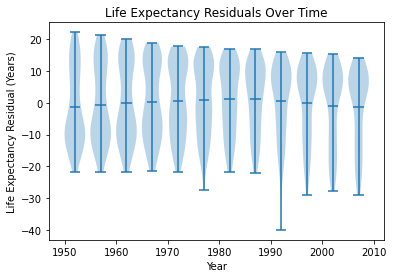

In [11]:
# makes a violin plot for resiudals vs year 

resid_per_year = data.groupby("year")["lifeExpResid"].apply(list)

plt.violinplot(resid_per_year, years, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy Residual (Years)")
plt.title("Life Expectancy Residuals Over Time");

### Question 8
This does match my expectations from question 4. The plot looks similar to the plot of life expectancy vs year, except it's standardized around *about* zero because the linear regression model's prediction is near the mean life expectancy for each year.

### Exercise 4

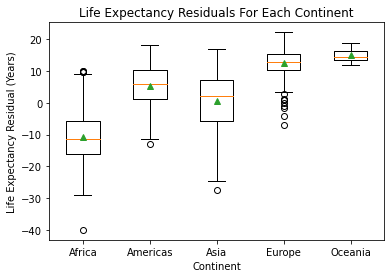

In [12]:
# makes a plot for resiudals vs continent across all yearsb

resid_per_cont = data.groupby("continent")["lifeExpResid"].apply(list)
continents = resid_per_cont.index.tolist() # for the tick labels

ax = plt.subplot()
plt.boxplot(resid_per_cont, showmeans=True)
plt.xlabel("Continent")
plt.ylabel("Life Expectancy Residual (Years)")
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(continents)
plt.title("Life Expectancy Residuals For Each Continent");

### Question 9
There clearly seems to be a dependence between model residuals and continent, which suggests that when performing a regression analysis of life expectancy across time, using dummy variables to account for the categorical effect could result in a more accurate model.

### Exercise 5

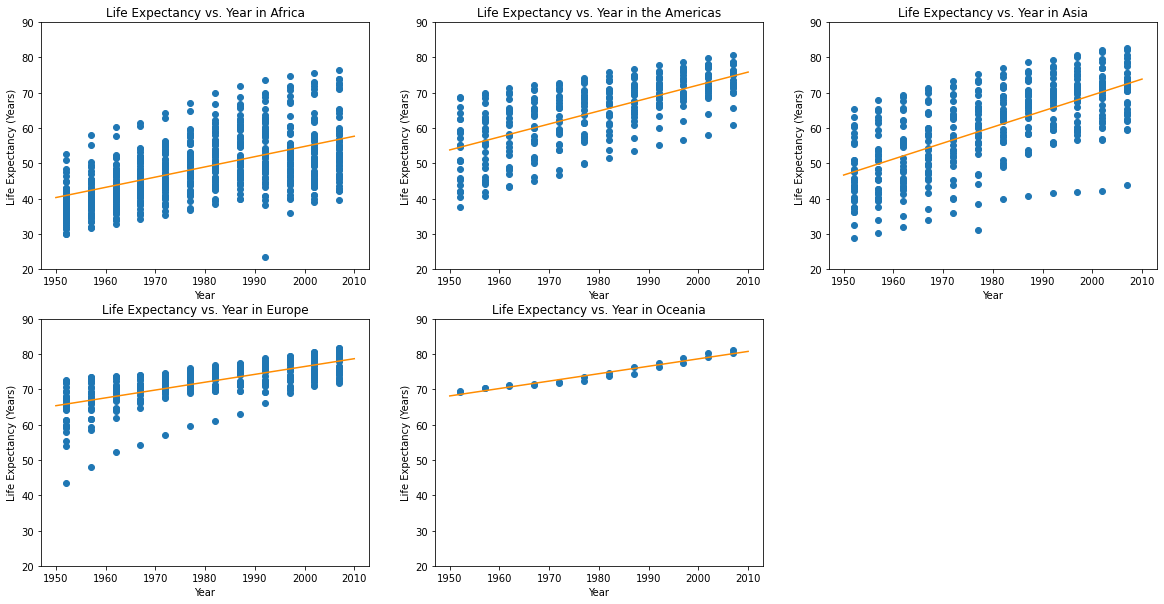

In [13]:
# sets up the figure
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.delaxes(ax[1][2])

# plots data for Africa
africa_data = data.loc[data["continent"] == "Africa"]
ax[0, 0].scatter(x=africa_data.year, y=africa_data.lifeExp)
ax[0, 0].set_title("Life Expectancy vs. Year in Africa")

# plots linaer regression for Africa
X = africa_data.year.values.reshape(-1, 1)
y = africa_data.lifeExp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(years_range.reshape(-1, 1))).set_index(years_range) # years_range from exercise 2
ax[0, 0].plot(reg_df, color="darkorange")

# plots data for the Americas
americas_data = data.loc[data["continent"] == "Americas"]
ax[0, 1].scatter(x=americas_data.year, y=americas_data.lifeExp)
ax[0, 1].set_title("Life Expectancy vs. Year in the Americas")

# plots linaer regression for the Americas
X = americas_data.year.values.reshape(-1, 1)
y = americas_data.lifeExp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(years_range.reshape(-1, 1))).set_index(years_range)
ax[0, 1].plot(reg_df, color="darkorange")

# plots data for Asia
asia_data = data.loc[data["continent"] == "Asia"]
ax[0, 2].scatter(x=asia_data.year, y=asia_data.lifeExp)
ax[0, 2].set_title("Life Expectancy vs. Year in Asia")

# plots linaer regression for Asia
X = asia_data.year.values.reshape(-1, 1)
y = asia_data.lifeExp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(years_range.reshape(-1, 1))).set_index(years_range)
ax[0, 2].plot(reg_df, color="darkorange")

# plots data for Europe
europe_data = data.loc[data["continent"] == "Europe"]
ax[1, 0].scatter(x=europe_data.year, y=europe_data.lifeExp)
ax[1, 0].set_title("Life Expectancy vs. Year in Europe")

# plots linaer regression for Asia
X = europe_data.year.values.reshape(-1, 1)
y = europe_data.lifeExp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(years_range.reshape(-1, 1))).set_index(years_range)
ax[1, 0].plot(reg_df, color="darkorange")

# plots data for Oceania
oceania_data = data.loc[data["continent"] == "Oceania"]
ax[1, 1].scatter(x=oceania_data.year, y=oceania_data.lifeExp)
ax[1, 1].set_title("Life Expectancy vs. Year in Oceania")

# plots linaer regression for Asia
X = oceania_data.year.values.reshape(-1, 1)
y = oceania_data.lifeExp
reg = LinearRegression().fit(X, y)
reg_df = pd.DataFrame(reg.predict(years_range.reshape(-1, 1))).set_index(years_range)
ax[1, 1].plot(reg_df, color="darkorange")

# axis titles and y axis limits for all subplotss
plt.setp(ax, xlabel="Year", ylabel="Life Expectancy (Years)", ylim=(20, 90));

### Question 10
This plot shows that my regression model should have an interaction term for continent and year because the effect of the year on a country's life expectancy is different in different continents; i.e. the slope and height of the continent-specific linear regressions above are different from each other.

### Exercise 6

In [14]:
# makes dataframe with year, lifeExp, and dummy variables for continent interaction
standard_features = data[["year", "lifeExp"]]
continent_features = pd.get_dummies(data.continent, drop_first=True, prefix="continent") # drop_first to avoid trap
features = pd.concat([standard_features, continent_features], axis=1)

continents = data.continent.values # overwrites variable from exercise 4

# adds columns for year*<continent>
for c in filter(lambda c: c != "Africa", continents):
    features["year*"+c] = features["year"]*features["continent_"+c]
    
features

,year,lifeExp,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,year*Asia,year*Europe,year*Americas,year*Oceania
0,1952,28.801,0,1,0,0,1952,0,0,0
1,1957,30.332,0,1,0,0,1957,0,0,0
2,1962,31.997,0,1,0,0,1962,0,0,0
3,1967,34.020,0,1,0,0,1967,0,0,0
4,1972,36.088,0,1,0,0,1972,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,0,0,0,0,0,0,0,0
1700,1992,60.377,0,0,0,0,0,0,0,0
1701,1997,46.809,0,0,0,0,0,0,0,0
1702,2002,39.989,0,0,0,0,0,0,0,0


In [15]:
X = features.drop("lifeExp", axis=1)
y = features["lifeExp"]

reg = LinearRegression().fit(X, y)

In [16]:
# prints the coefficients of the model
coefs = pd.DataFrame(reg.coef_).set_index(X.columns)
coefs.columns = ["coefficient"]
coefs

,coefficient
year,0.289529
continent_Americas,-138.848447
continent_Asia,-312.633049
continent_Europe,156.846852
continent_Oceania,182.349883
year*Asia,0.163593
year*Europe,-0.067597
year*Americas,0.078122
year*Oceania,-0.079257


### Question 11
All coefficients seem to be significantly different than zero. This makes sense, because every one of these variables should have a significant impact on life expectancy.

### Question 12

In [17]:
# for reference when inputting arrays to make predictions
# this is the order of features
pd.Series(X.columns)

0                  year
1    continent_Americas
2        continent_Asia
3      continent_Europe
4     continent_Oceania
5             year*Asia
6           year*Europe
7         year*Americas
8          year*Oceania
dtype: object

In [18]:
# gets slope for Africa
reg.predict([[1, 0, 0, 0, 0, 0, 0, 0, 0]]) - reg.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([0.28952926])

In [19]:
# gets slope for the Americas
reg.predict([[1, 1, 0, 0, 0, 0, 0, 1, 0]]) - reg.predict([[0, 1, 0, 0, 0, 0, 0, 0, 0]])

array([0.36765094])

In [20]:
# gets slope for Asia
reg.predict([[1, 0, 1, 0, 0, 1, 0, 0, 0]]) - reg.predict([[0, 0, 1, 0, 0, 0, 0, 0, 0]])

array([0.4531224])

In [21]:
# gets slope for Europe
reg.predict([[1, 0, 0, 1, 0, 0, 1, 0, 0]]) - reg.predict([[0, 0, 0, 1, 0, 0, 0, 0, 0]])

array([0.22193214])

In [22]:
# gets slope for Oceania
reg.predict([[1, 0, 0, 0, 1, 0, 0, 0, 0]]) - reg.predict([[0, 0, 0, 0, 1, 0, 0, 0, 1]])

array([0.36878615])

I found the average increase in life expectancy each year for each continent by predicting life expectancy at year 1 and subtracting from it the life expectancy prediction at year 0. Here's the results:

Each year, life expectancy increases by...
- Africa: 0.28952926 years
- The Americas: 0.36765094 years
- Asia: 0.4531224 years
- Europe: 0.22193214 years
- Oceania: 0.36878615 years

### Exercise 7

In [23]:
features["prediction"] = reg.predict(X)
features["residual"] = features["lifeExp"] - features["prediction"]

features

,year,lifeExp,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,year*Asia,year*Europe,year*Americas,year*Oceania,prediction,residual
0,1952,28.801,0,1,0,0,1952,0,0,0,47.604037,-18.803037
1,1957,30.332,0,1,0,0,1957,0,0,0,49.869649,-19.537649
2,1962,31.997,0,1,0,0,1962,0,0,0,52.135261,-20.138261
3,1967,34.020,0,1,0,0,1967,0,0,0,54.400873,-20.380873
4,1972,36.088,0,1,0,0,1972,0,0,0,56.666485,-20.578485
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1987,62.351,0,0,0,0,0,0,0,0,51.036800,11.314200
1700,1992,60.377,0,0,0,0,0,0,0,0,52.484446,7.892554
1701,1997,46.809,0,0,0,0,0,0,0,0,53.932092,-7.123092
1702,2002,39.989,0,0,0,0,0,0,0,0,55.379739,-15.390739


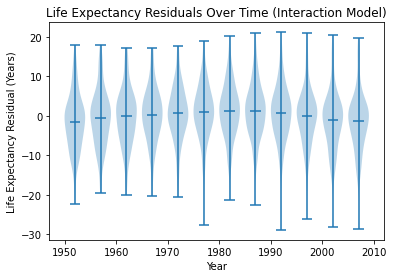

In [24]:
# makes a violin plot for resiudals vs year 

resid_per_year = features.groupby("year")["residual"].apply(list)

plt.violinplot(resid_per_year, years, widths=4, showmeans=True) # uses years variable from question 1
plt.xlabel("Year")
plt.ylabel("Life Expectancy Residual (Years)")
plt.title("Life Expectancy Residuals Over Time (Interaction Model)");

This plot shows that the assumption that life expectancy depends on year and continent seems to hold up very well; the distributious of residuals for each year appears to be centered about the mean.